In [1]:
import numpy as np
import matplotlib.pyplot as pl
from scipy import integrate
import warnings
warnings.filterwarnings('ignore')

# epsilon = 0.1
t0 = 0.0
x0 = 300.0
v = 2.0

In [2]:
ls = 2**13
data = np.fromfile('byparts/X.bin')
lt = np.shape(data)[0]//(3*ls)
# data = data.reshape(ls*lt, 3)
data = data.reshape(np.shape(data)[0]//3, 3)
space = np.zeros((ls))
time = np.zeros((lt))
phi1 = np.zeros((lt,ls))
for i in range ((lt)):
    time[i] = data[ls*i,0]
    
for i in range ((ls)):
    space[i] = data[i,1]
    
for i in range ((lt)):
    for j in range ((ls)):
        phi1[i,j] = data[ls*i+j,2]

In [3]:
print(time)

[0.0000e+00 1.2000e-01 2.4000e-01 ... 5.9976e+02 5.9988e+02 6.0000e+02]


In [4]:
print(space) 

[0.0000000e+00 3.1250000e-01 6.2500000e-01 ... 2.5590625e+03 2.5593750e+03
 2.5596875e+03]


In [5]:
print(phi1)

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-6.38712668e-09  6.38724458e-09 -6.38736265e-09 ...  6.38677384e-09
  -6.38689138e-09  6.38700898e-09]
 [ 9.37915506e-09 -9.37907253e-09  9.37898968e-09 ... -9.37940091e-09
   9.37931921e-09 -9.37923727e-09]
 ...
 [ 4.55087947e-02  4.31393754e-02  3.84478730e-02 ...  3.40336255e-02
   4.11097222e-02  4.51466896e-02]
 [ 4.16182959e-02  3.74803060e-02  3.31997329e-02 ...  3.84706205e-02
   4.29094681e-02  4.37167934e-02]
 [ 3.77301565e-02  3.62102974e-02  3.35432861e-02 ...  3.85692100e-02
   3.93199617e-02  3.87199627e-02]]


(250.0, 1600.0)

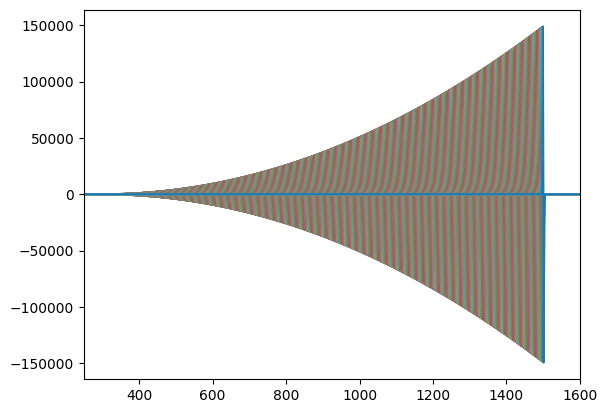

In [6]:
for i in range(lt):
    pl.plot(space[:], phi1[i,:])
pl.xlim(250, 1600)

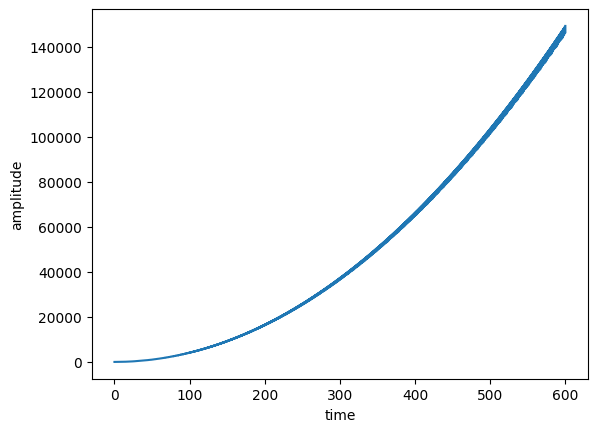

In [7]:
amp1 = np.array([ np.max(np.abs( phi1[i, :] )) for i in range(lt) ])
    
pl.plot(time[:lt], amp1)
pl.xlabel('time')
pl.ylabel('amplitude')
# pl.title(r'$v = 0.7$')
pl.show()

\begin{equation}
	\large x_c = x_0 + v (t - t_0), \qquad u = \frac{\sqrt{v}}{2} (x - x_c), \qquad \varphi ^{(0)} = \frac{v}{2} \text{sech} ^2 u
\end{equation}

In [8]:
def xc(t):
    return x0 + v*(t - t0)

def u(t, x):
    return (np.sqrt(v)/2) * (x - xc(t))

def soliton(t, x):
    return (v/2) * np.cosh(u(t, x))**(-2)

(250.0, 1000.0)

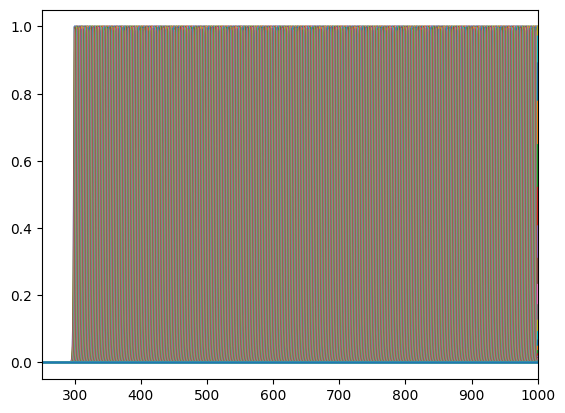

In [9]:
for i in range(lt):
    pl.plot(space, soliton(time[i], space))
pl.xlim(250.0, 1000.0)

\begin{equation}
    \large \lambda = (\lambda ^1 , \lambda ^2) = (x_c , v) ; \qquad \beta ^{(0)} = ( v , 0 )
\end{equation}

\begin{equation}
    \large \frac{\partial \varphi ^{(0)}}{\partial \lambda ^1} = \frac{\partial \varphi ^{(0)}}{\partial x_c} = \frac{v^{3/2}}{2} \text{sech}^2 u \tanh u , \qquad \frac{\partial \varphi ^{(0)}}{\partial \lambda ^2} = \frac{\partial \varphi ^{(0)}}{\partial v} = \frac{1}{2} \text{sech}^2 u [1 - u \tanh u]
\end{equation}

In [10]:
def phi0_1(t, x):
    return (v**(3/2)/2) * np.cosh(u(t, x))**(-2) * np.tanh(u(t, x))

def phi0_2(t, x):
    return (1/2) * np.cosh(u(t, x))**(-2) * (1 - u(t, x) * np.tanh(u(t, x)))

(250.0, 1000.0)

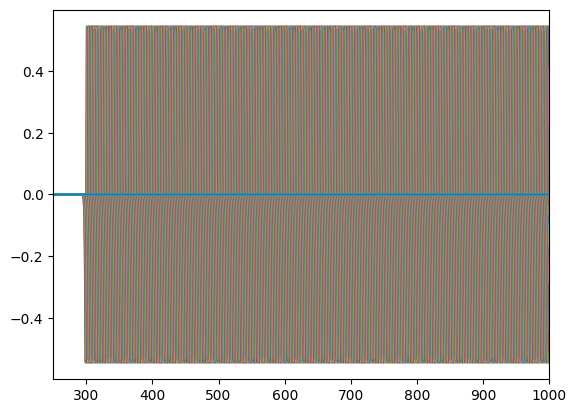

In [11]:
for i in range(lt):
    pl.plot(space, phi0_1(time[i], space))
pl.xlim(250.0, 1000.0)

(250.0, 550.0)

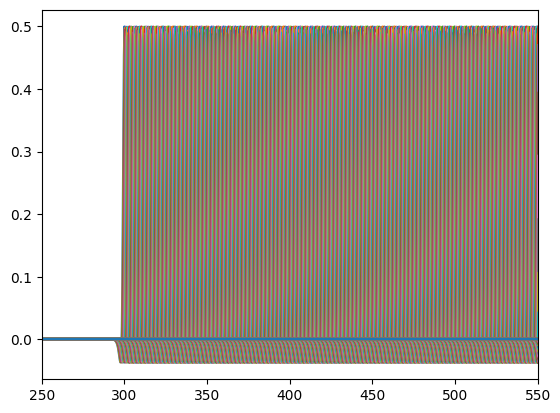

In [12]:
for i in range(lt):
    pl.plot(space, phi0_2(time[i], space))
pl.xlim(250.0, 550.0)

\begin{gather}
    \large e^{(0)}_1 = (t - t_0) \frac{\partial \varphi ^{(0)}}{\partial \lambda ^1}, \qquad e^{(0)}_2 = \frac{1}{2} (t - t_0)^2 \frac{\partial \varphi ^{(0)}}{\partial \lambda ^1} + (t - t_0) \frac{\partial \varphi ^{(0)}}{\partial \lambda ^2}, \\
    \large e^{(1)}_1 = \frac{\partial \varphi ^{(0)}}{\partial \lambda ^1}, \qquad e^{(1)}_2 = (t - t_0) \frac{\partial \varphi ^{(0)}}{\partial \lambda ^1} + \frac{\partial \varphi ^{(0)}}{\partial \lambda ^2}
\end{gather}

In [13]:
def e0_1(ti): # ti: time index
    return (time[ti] - t0) * phi0_1(time[ti], space)
    
def e0_2(ti):
    return 0.5 * (time[ti] - t0)**2 * phi0_1(time[ti], space) + (time[ti] - t0) * phi0_2(time[ti], space)

def e1_1(ti):
    return phi0_1(time[ti], space)

def e1_2(ti):
    return (time[ti] - t0) * phi0_1(time[ti], space) + phi0_2(time[ti], space)

(250.0, 550.0)

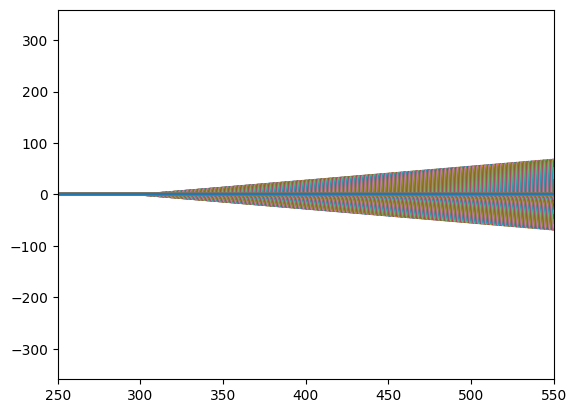

In [14]:
for i in range(lt):
    pl.plot(space, e0_1(i))
pl.xlim(250.0, 550.0)

(250.0, 550.0)

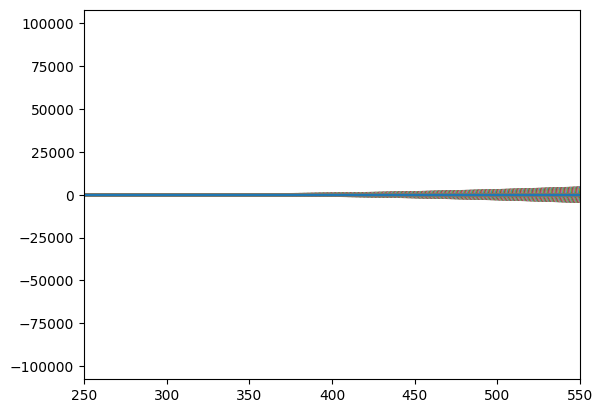

In [15]:
for i in range(lt):
    pl.plot(space, e0_2(i))
pl.xlim(250.0, 550.0)

(250.0, 550.0)

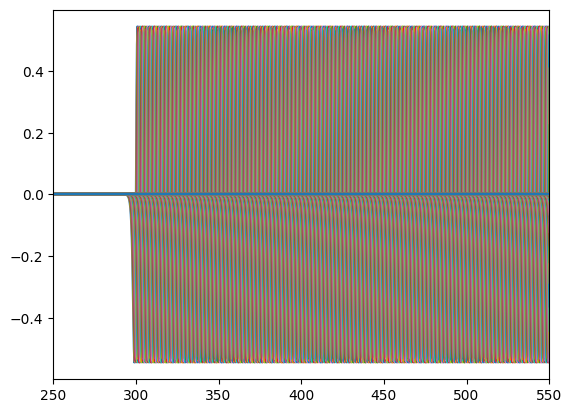

In [16]:
for i in range(lt):
    pl.plot(space, e1_1(i))
pl.xlim(250.0, 550.0)

(250.0, 550.0)

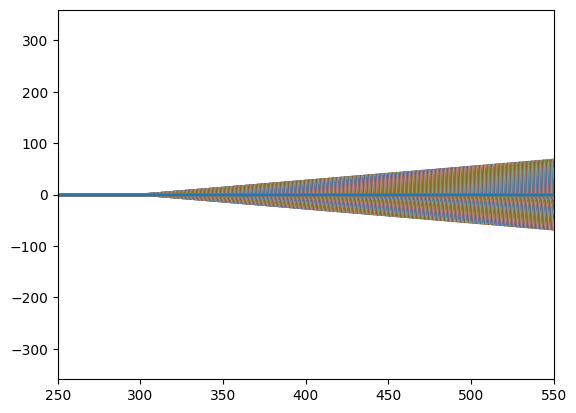

In [17]:
for i in range(lt):
    pl.plot(space, e1_2(i))
pl.xlim(250.0, 550.0)

In [18]:
# def integration(f):
#     # N = ls
#     return (np.pi/(2.0 * ls * ell)) * np.sum(np.array([ (ell**2 + radius[i]**2) * f[i] for i in range(ls) ]))

def integration(f): # T: time index, total time
    return integrate.simpson(f, space)

In [19]:
# test
integration(np.exp(-space))

1.0011356297499014

\begin{equation}
    \large M ^{(\mu )(\nu )}_{ij} = \int dt \, dx \, e^{(\mu )}_i e^{(\nu )}_j = \int dt \, m ^{(\mu )(\nu )}_{ij}
\end{equation}

In [20]:
# mu = nu = 0
# ti: time index

# def m00_11(ti):
#     f = e01_1(ti) * e01_1(ti) + e02_1(ti) * e02_1(ti)
#     return integration(f)

# def m00_12(ti):
#     f = e01_1(ti) * e01_2(ti) + e02_1(ti) * e02_2(ti)
#     return integration(f)

# def m00_21(ti):
#     f = e01_2(ti) * e01_1(ti) + e02_2(ti) * e02_1(ti)
#     return integration(f)

def m00_22(ti):
    f = e0_2(ti) * e0_2(ti)
    return integration(f)

# mu = 0, nu = 1

# def m01_11(ti):
#     f = e01_1(ti) * e11_1(ti) + e02_1(ti) * e12_1(ti)
#     return integration(f)

# def m01_12(ti):
#     f = e01_1(ti) * e11_2(ti) + e02_1(ti) * e12_2(ti)
#     return integration(f)

def m01_21(ti):
    f = e0_2(ti) * e1_1(ti)
    return integration(f)

def m01_22(ti):
    f = e0_2(ti) * e1_2(ti)
    return integration(f)

# mu = 1, nu = 0

# def m10_11(ti):
#     f = e11_1(ti) * e01_1(ti) + e12_1(ti) * e02_1(ti)
#     return integration(f)

def m10_12(ti):
    f = e1_1(ti) * e0_2(ti)
    return integration(f)

# def m10_21(ti):
#     f = e11_2(ti) * e01_1(ti) + e12_2(ti) * e02_1(ti)
#     return integration(f)

def m10_22(ti):
    f = e1_2(ti) * e0_2(ti)
    return integration(f)

# mu = 1, nu = 1

def m11_11(ti):
    f = e1_1(ti) * e1_1(ti)
    return integration(f)

def m11_12(ti):
    f = e1_1(ti) * e1_2(ti)
    return integration(f)

def m11_21(ti):
    f = e1_2(ti) * e1_1(ti)
    return integration(f)

def m11_22(ti):
    f = e1_2(ti) * e1_2(ti)
    return integration(f)

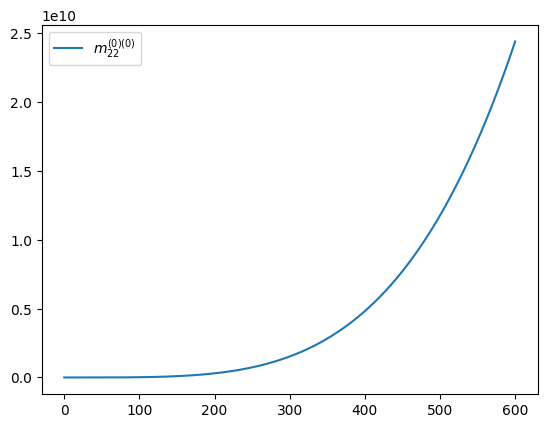

In [21]:
T = lt - 1
pl.plot(time[:T], [ m00_22(i) for i in range(T) ], label=r'$m^{(0)(0)}_{22}$')
pl.legend()

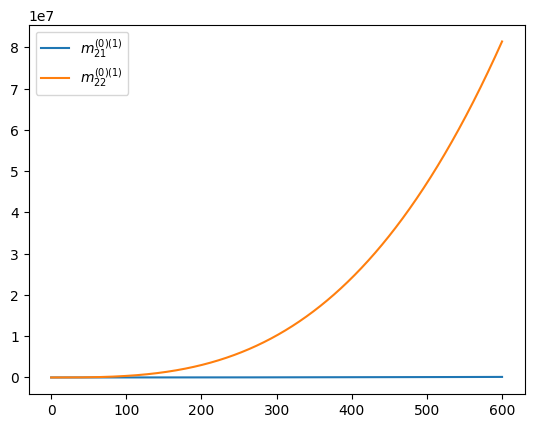

In [22]:
pl.plot(time[:T], [ m01_21(i) for i in range(T) ], label=r'$m^{(0)(1)}_{21}$')
pl.plot(time[:T], [ m01_22(i) for i in range(T) ], label=r'$m^{(0)(1)}_{22}$')
pl.legend()

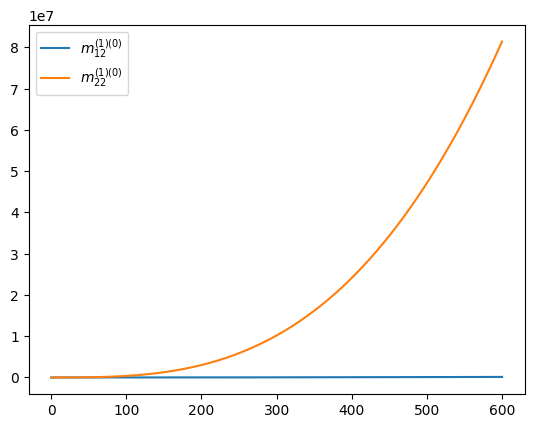

In [23]:
pl.plot(time[:T], [ m10_12(i) for i in range(T) ], label=r'$m^{(1)(0)}_{12}$')
pl.plot(time[:T], [ m10_22(i) for i in range(T) ], label=r'$m^{(1)(0)}_{22}$')
pl.legend()

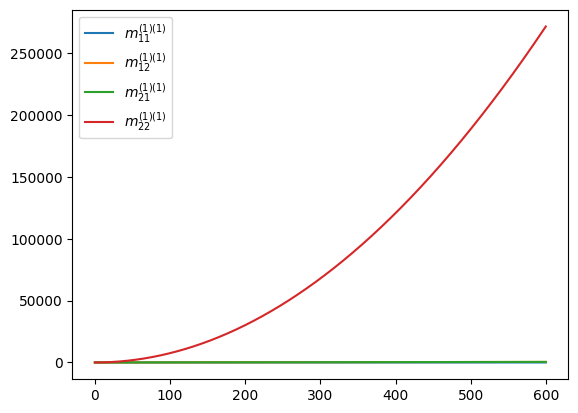

In [24]:
pl.plot(time[:T], [ m11_11(i) for i in range(T) ], label=r'$m^{(1)(1)}_{11}$')
pl.plot(time[:T], [ m11_12(i) for i in range(T) ], label=r'$m^{(1)(1)}_{12}$')
pl.plot(time[:T], [ m11_21(i) for i in range(T) ], label=r'$m^{(1)(1)}_{21}$')
pl.plot(time[:T], [ m11_22(i) for i in range(T) ], label=r'$m^{(1)(1)}_{22}$')
pl.legend()

In [25]:
integrate.simpson([ m00_22(i) for i in range(T) ], time[:T])

2929604442647.8735

\begin{equation}
    \large M ^{(\mu) (\nu)}_{ij}= \begin{pmatrix}
    M ^{(0) (0)}_{22} & M ^{(0)(1)}_{21} & M ^{(0)(1)}_{22} \\
    M ^{(1) (0)}_{12} & M ^{(1)(1)}_{11} & M ^{(1)(1)}_{12} \\
    M ^{(1) (0)}_{22} & M ^{(1)(1)}_{21} & M ^{(1)(1)}_{22}
    \end{pmatrix}
\end{equation}

In [26]:
def time_integration(u, T): # T: time index, total time
    return integrate.simpson([ u(i) for i in range(T) ], time[:T])

In [27]:
# def M(T): # T: time index, total time
#     return np.array([[time_integration(m00_11, T), time_integration(m00_12, T), time_integration(m01_11, T), time_integration(m01_12, T)],
#                      [time_integration(m00_21, T), time_integration(m00_22, T), time_integration(m01_21, T), time_integration(m01_22, T)],
#                      [time_integration(m10_11, T), time_integration(m10_12, T), time_integration(m11_11, T), time_integration(m11_12, T)],
#                      [time_integration(m10_21, T), time_integration(m10_22, T), time_integration(m11_21, T), time_integration(m11_22, T)]])

def M(T): # T: time index, total time
    return np.array([[time_integration(m00_22, T), time_integration(m01_21, T), time_integration(m01_22, T)],
                    [time_integration(m10_12, T), time_integration(m11_11, T), time_integration(m11_12, T)],
                    [time_integration(m10_22, T), time_integration(m11_21, T), time_integration(m11_22, T)]])

In [28]:
A = M(T)

In [29]:
np.linalg.matrix_rank(A)

3

In [30]:
print(np.linalg.inv(A))

[[ 1.22875921e-11  3.68480325e-07 -3.68554036e-09]
 [ 3.68480325e-07  1.98904995e-02 -1.32627611e-04]
 [-3.68554036e-09 -1.32627611e-04  1.17914112e-06]]


In [31]:
print(np.matmul(A, np.linalg.inv(A)))

[[ 1.00000000e+00  1.07005398e-10 -4.74030450e-13]
 [-2.63046505e-20  1.00000000e+00  4.50782705e-18]
 [-3.61216829e-17 -4.34183850e-13  1.00000000e+00]]


\begin{equation}
    \large V ^{(\nu )}_{i} = \int dt \, dx \, e^{(\nu )}_i \varphi ^{(1)} = \int dt \, v ^{(\nu )}_{i}
\end{equation}

In [32]:
# def v0_1(ti):
#     g = e01_1(ti) * phi1[ti]
#     return integration(g)

def v0_2(ti):
    g = e0_2(ti) * phi1[ti]
    return integration(g)

def v1_1(ti):
    g = e1_1(ti) * phi1[ti]
    return integration(g)

def v1_2(ti):
    g = e1_2(ti) * phi1[ti]
    return integration(g)

In [33]:
# def V(T): # T: time index, total time
#     return np.array([[time_integration(v0_1, T)],
#                      [time_integration(v0_2, T)],
#                      [time_integration(v1_1, T)],
#                      [time_integration(v1_2, T)]])

def V(T): # T: time index, total time
    return np.array([[time_integration(v0_2, T)],
                     [time_integration(v1_1, T)],
                     [time_integration(v1_2, T)]])

In [34]:
V(T)

array([[-4.45757115e+12],
       [-4.12779226e+07],
       [-1.85750669e+10]])

\begin{equation}
    \large \psi ^{i (\mu)} = ((M^{-1})^{(\mu)(\nu)})^{ij} V_j^{(\nu)}
\end{equation}

In [35]:
def psi(T): # T: time index, total time
    return np.matmul(np.linalg.inv(M(T)), V(T))

In [36]:
psi(T)

array([[-1.52375956],
       [ 0.97645722],
       [ 0.52543961]])

In [37]:
TT = [ 2, 100, 250 , 500 , 1000, 1500, 2000 , 3000, 3500, 4000, 4500, 5000 ]
PP = [ psi(tt) for tt in TT ]

In [68]:
time[TT]

array([2.4e-01, 1.2e+01, 3.0e+01, 6.0e+01, 1.2e+02, 1.8e+02, 2.4e+02,
       3.6e+02, 4.2e+02, 4.8e+02, 5.4e+02, 6.0e+02])

In [67]:
beta_v = [ PP[i][0, 0] for i in range(len(TT)) ]
beta_v

[-2.847162369334505,
 -1.525532690639758,
 -1.5231944361347873,
 -1.5233780319408405,
 -1.5235755500847208,
 -1.523650448993808,
 -1.5236889712303892,
 -1.5237280183612567,
 -1.523739257395505,
 -1.5237477035096,
 -1.523754288699745,
 -1.5237595630501495]

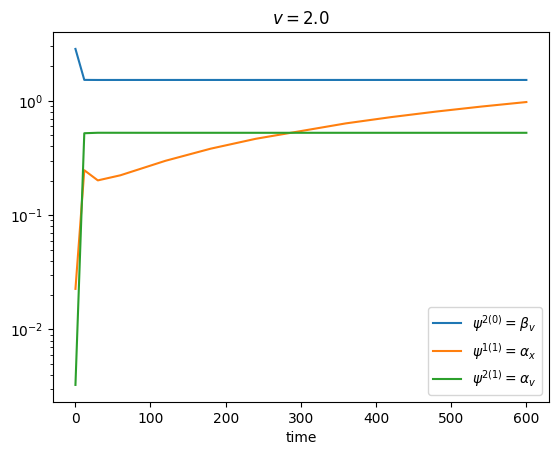

In [38]:
pl.plot(time[TT], np.abs([ PP[i][0, 0] for i in range(len(TT)) ]), label=r'$\psi ^{2(0)} = \beta _v $')
pl.plot(time[TT], np.abs([ PP[i][1, 0] for i in range(len(TT)) ]), label=r'$\psi ^{1(1)} = \alpha _x $')
pl.plot(time[TT], np.abs([ PP[i][2, 0] for i in range(len(TT)) ]), label=r'$\psi ^{2(1)} = \alpha _v $')

pl.legend()
pl.yscale('log')
pl.xlabel('time')
pl.title(r'$v = 2.0$')
pl.savefig('kdv-v2_0.png')

Text(0.5, 1.0, '$v = 2.0$')

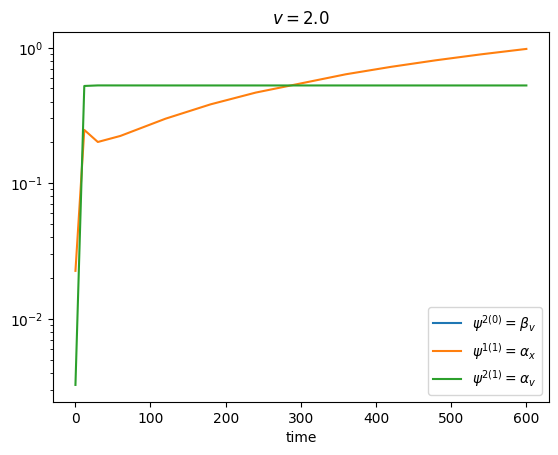

In [39]:
pl.plot(time[TT], [ PP[i][0, 0] for i in range(len(TT)) ], label=r'$\psi ^{2(0)} = \beta _v $')
pl.plot(time[TT], [ PP[i][1, 0] for i in range(len(TT)) ], label=r'$\psi ^{1(1)} = \alpha _x $')
pl.plot(time[TT], [ PP[i][2, 0] for i in range(len(TT)) ], label=r'$\psi ^{2(1)} = \alpha _v $')

pl.legend()
pl.yscale('log')
pl.xlabel('time')
pl.title(r'$v = 2.0$')#, $ T_{max} = 2400$')
# pl.savefig('v0-5.png')

\begin{equation}
    \large \varphi ^{(1)} _{\perp} = \varphi ^{(1)} - \psi ^{j (\mu )} e^{(\mu )}_j
\end{equation}

In [40]:
P = PP[-1]
print(P)
# T = lt - 1
I = phi1[T] - (P[0][0]*e0_2(T) + P[1][0]*e1_1(T) + P[2][0]*e1_2(T))

[[-1.52375956]
 [ 0.97645722]
 [ 0.52543961]]


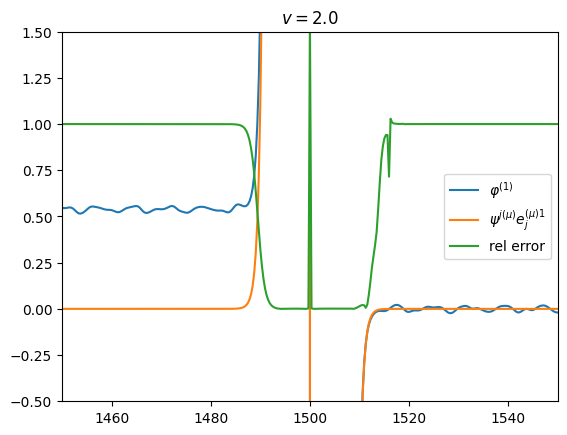

In [45]:
pl.plot(space, phi1[T], label=r'$\varphi ^{(1)} $')
pl.plot(space, P[0][0]*e0_2(T) + P[1][0]*e1_1(T) + P[2][0]*e1_2(T), label=r'$\psi ^{j (\mu )} e^{(\mu ) 1}_j$')
pl.plot(space, np.abs(I/phi1[T]), label=r'rel error')
pl.ylim(-0.5, 1.5)

# pl.plot(space, I, label=r'$\varphi ^{(1) 1} _{\perp}$')
pl.legend()
pl.xlim(1450, 1550)
pl.title(r'$v = 2.0$')
pl.savefig('kdv-v2_0-error.png')